## Лабораторная работа 7
Дата сет - продажа домов в округе Кинг

In [1]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
import pandas as pd

df_house = pd.read_csv(".//static//csv//kc_house_data.csv")
df_house.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [2]:
from skfuzzy import control as ctrl

# Определим входные и выходные переменные
sqft_living = ctrl.Antecedent(df_house['sqft_living'].sort_values(), "sqft_living")
bathrooms = ctrl.Antecedent(df_house['bathrooms'].sort_values(), "bathrooms")
price = ctrl.Consequent(df_house['price'].sort_values(), "price")

c:\Users\user\Desktop\MII\lab1para\aim\aimenv\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


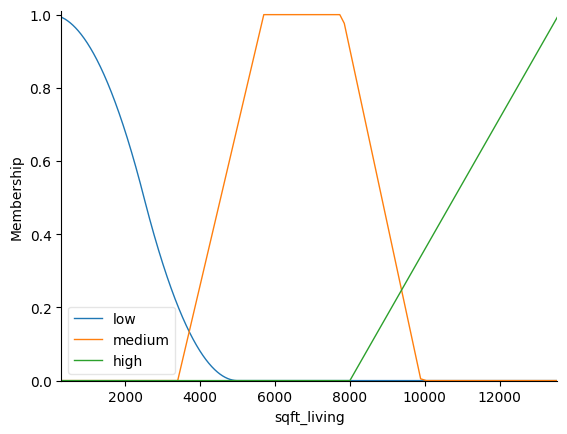

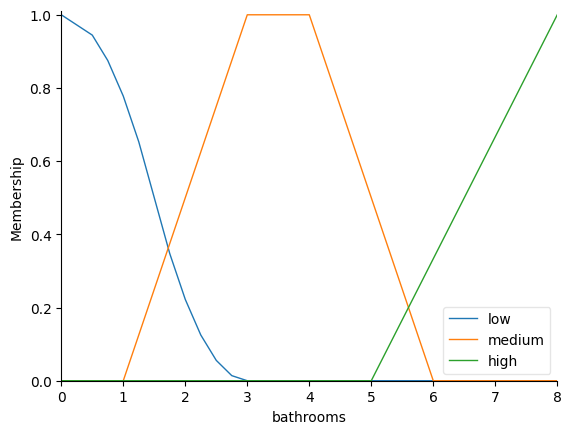

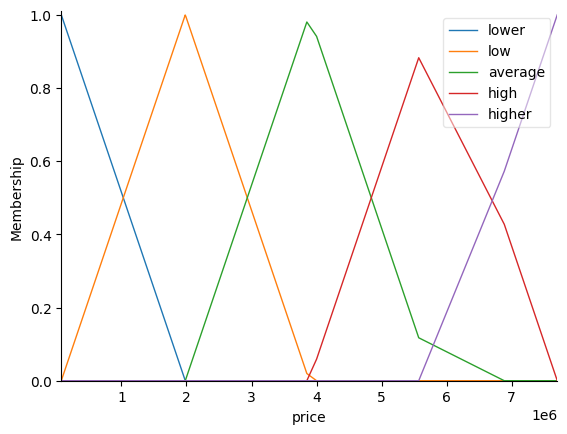

In [3]:
sqft_living['low'] = fuzz.zmf(sqft_living.universe, 0, 5000)
sqft_living['medium'] = fuzz.trapmf(sqft_living.universe, [3400, 5700, 7800, 9900])
sqft_living['high'] = fuzz.trimf(sqft_living.universe, [8000, 13580, 13580])
sqft_living.view()

bathrooms['low'] = fuzz.zmf(bathrooms.universe, 0, 3)
bathrooms['medium'] = fuzz.trapmf(bathrooms.universe, [1, 3, 4, 6])
bathrooms['high'] = fuzz.trimf(bathrooms.universe, [5, 8, 8])
bathrooms.view()

#price['low'] = fuzz.zmf(price.universe, 0, 2500000)
#price['medium'] = fuzz.trapmf(price.universe, [1500000, 3000000, 4000000, 5500000])
#price['high'] = fuzz.trimf(price.universe, [4000000, 9000000, 11000000])

# Для более точного определения цены 
price.automf(5, variable_type="quant")
price.view()

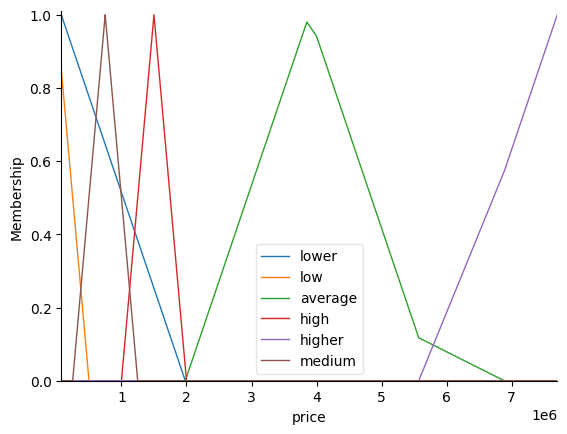

In [6]:
# Ручное определение функций принадлежности для price
price['low'] = fuzz.trimf(price.universe, [0, 0, 500000])
price['medium'] = fuzz.trimf(price.universe, [250000, 750000, 1250000])
price['high'] = fuzz.trimf(price.universe, [1000000, 1500000, 2000000])

# Визуализация функций принадлежности для price
price.view()

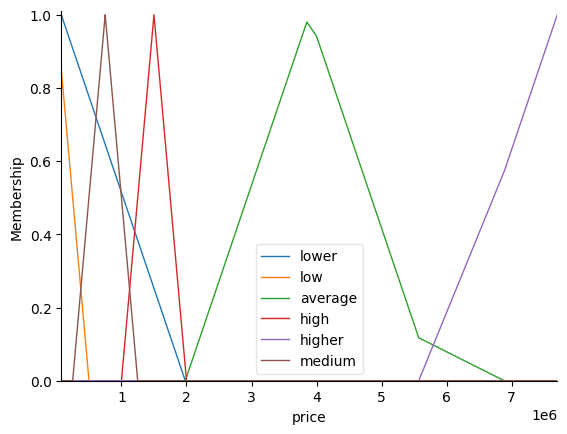

In [7]:
# Ручное определение функций принадлежности для price
price['low'] = fuzz.trimf(price.universe, [0, 0, 500000])
price['medium'] = fuzz.trimf(price.universe, [250000, 750000, 1250000])
price['high'] = fuzz.trimf(price.universe, [1000000, 1500000, 2000000])

# Визуализация функций принадлежности для price
price.view()

In [8]:

# Определение правил нечеткого вывода
rule1 = ctrl.Rule(sqft_living['low'] & bathrooms['low'], price['low'])
rule2 = ctrl.Rule(sqft_living['medium'] & bathrooms['medium'], price['medium'])
rule3 = ctrl.Rule(sqft_living['high'] & bathrooms['high'], price['high'])
rule4 = ctrl.Rule(sqft_living['low'] & bathrooms['high'], price['medium'])
rule5 = ctrl.Rule(sqft_living['high'] & bathrooms['low'], price['medium'])

# Создание системы управления
price_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
price_sim = ctrl.ControlSystemSimulation(price_ctrl)

# Функция для нечеткого вывода
def fuzzy_inference(sqft, bath):
    price_sim.input['sqft_living'] = sqft
    price_sim.input['bathrooms'] = bath
    price_sim.compute()
    return price_sim.output['price']

# Тестовые данные
test_data = [
    (2000, 2, 300000),
    (4000, 3, 500000),
    (6000, 4, 700000),
    (8000, 5, 900000)
]

# Оценка системы
results = []
for sqft, bath, actual_price in test_data:
    try:
        inferred_price = fuzzy_inference(sqft, bath)
        results.append((sqft, bath, actual_price, inferred_price))
    except ValueError as e:
        print(f"Ошибка для sqft_living={sqft}, bathrooms={bath}: {e}")

# Вывод результатов
print("\nРезультаты оценки:")
print("Sqft Living | Bathrooms | Actual Price | Inferred Price")
for sqft, bath, actual_price, inferred_price in results:
    print(f"{sqft:11} | {bath:9} | {actual_price:12} | {inferred_price:.2f}")

# Вычисление метрик качества
if results:
    actual_prices = [actual for _, _, actual, _ in results]
    inferred_prices = [inferred for _, _, _, inferred in results]

    mae = np.mean(np.abs(np.array(actual_prices) - np.array(inferred_prices)))
    rmse = np.sqrt(np.mean((np.array(actual_prices) - np.array(inferred_prices)) ** 2))

    print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
    print(f"Среднеквадратичная ошибка (RMSE): {rmse:.2f}")
else:
    print("Нет результатов для оценки.")


Результаты оценки:
Sqft Living | Bathrooms | Actual Price | Inferred Price
       2000 |         2 |       300000 | 261114.59
       4000 |         3 |       500000 | 750000.00
       6000 |         4 |       700000 | 750000.00
       8000 |         5 |       900000 | 750000.00

Средняя абсолютная ошибка (MAE): 122221.35
Среднеквадратичная ошибка (RMSE): 149174.46



Результаты оценки:
Sqft Living | Bathrooms | Actual Price | Inferred Price
       2000 |         2 |       300000 | 261114.59
       4000 |         3 |       500000 | 750000.00
       6000 |         4 |       700000 | 750000.00
       8000 |         5 |       900000 | 750000.00

Средняя абсолютная ошибка (MAE): 122221.35
Среднеквадратичная ошибка (RMSE): 149174.46


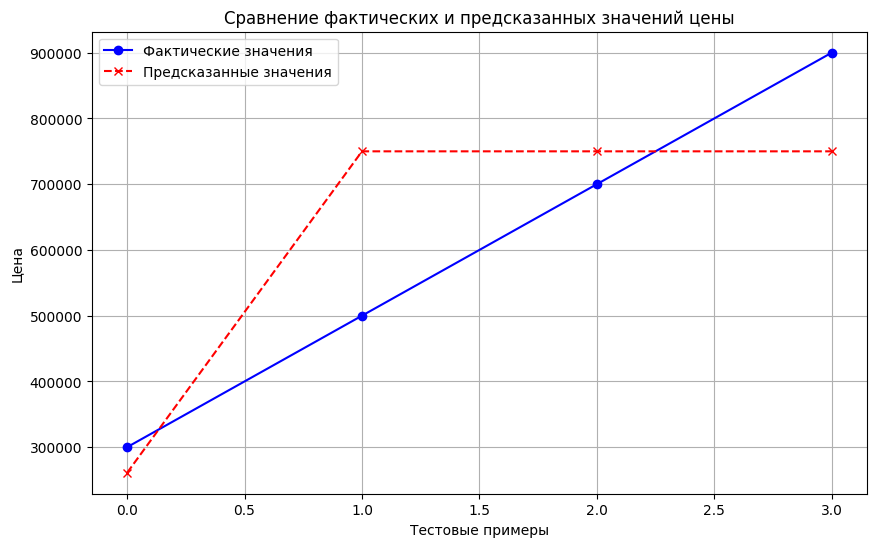

In [9]:

# Вывод результатов
print("\nРезультаты оценки:")
print("Sqft Living | Bathrooms | Actual Price | Inferred Price")
for sqft, bath, actual_price, inferred_price in results:
    print(f"{sqft:11} | {bath:9} | {actual_price:12} | {inferred_price:.2f}")

# Вычисление метрик качества
if results:
    actual_prices = [actual for _, _, actual, _ in results]
    inferred_prices = [inferred for _, _, _, inferred in results]

    mae = np.mean(np.abs(np.array(actual_prices) - np.array(inferred_prices)))
    rmse = np.sqrt(np.mean((np.array(actual_prices) - np.array(inferred_prices)) ** 2))

    print(f"\nСредняя абсолютная ошибка (MAE): {mae:.2f}")
    print(f"Среднеквадратичная ошибка (RMSE): {rmse:.2f}")

    # Построение графика
    plt.figure(figsize=(10, 6))
    plt.plot(actual_prices, label="Фактические значения", marker='o', linestyle='-', color='blue')
    plt.plot(inferred_prices, label="Предсказанные значения", marker='x', linestyle='--', color='red')
    plt.title("Сравнение фактических и предсказанных значений цены")
    plt.xlabel("Тестовые примеры")
    plt.ylabel("Цена")
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Нет результатов для оценки.")